In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = np.load("tidal_clean_data.npz")   # importintg tidal data
x_data = data["x_data"]
y_data = data["y_data"]

In [11]:
# same stuff from step 2
def oscillatory_model(x, A, omega, phi, C): # defining the tide model for data fitting
    return A * np.sin(omega * x + phi) + C

sigma = 0.25                # this is the error in feet

p0 = [
    1.0,                    # 1 ft amplitude
    2 * np.pi/12.4,         # one cycle / 12.4 hours
    0.0,                    # phi is the phase shift and we're starting with zero phase
    np.mean(y_data)         # starting at the average tide height
]

popt, pcov = curve_fit(
    oscillatory_model,
    x_data,
    y_data,
    p0=p0,
    sigma=np.full_like(x_data, sigma),
    absolute_sigma=True
)

A_fit, omega_fit, phi_fit, C_fit = popt
print("Best Fit Parameters:", popt)

Best Fit Parameters: [3.25411372 0.31489963 5.60047671 2.57683605]


In [12]:
# calculating the residuals (data - model) to print the standard deviation
model_values = oscillatory_model(x_data, *popt)
residuals = y_data - model_values

res_std = np.std(residuals)
print("Residual Standard Deviation (ft):", res_std)

sigma_meas = sigma
if res_std > sigma_meas:
    intrinsic = np.sqrt(res_std**2 - sigma_meas**2)
    print("Estimated Intrinsic Scatter (ft):", intrinsic)
else:
    print("The residual scatter is not larger than the measurement error!!!")

Residual Standard Deviation (ft): 0.7342740162403333
Estimated Intrinsic Scatter (ft): 0.6904044690800525


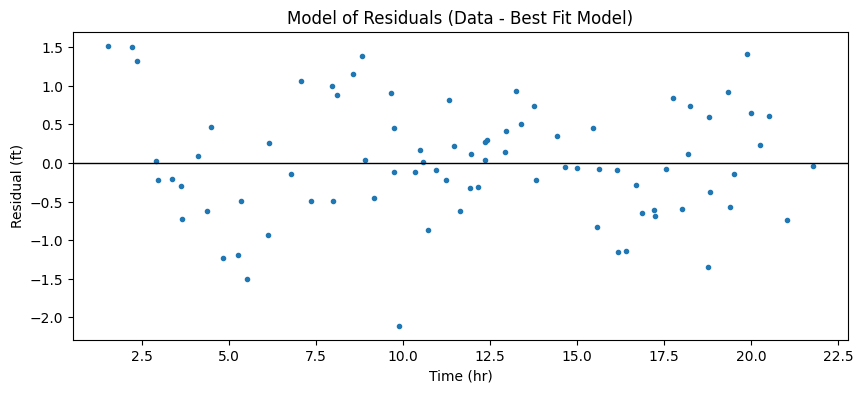

In [13]:
plt.figure(figsize=(10,4))     # plotting the residuals as a function of time

plt.plot(x_data, residuals, "o", markersize=3)
plt.axhline(0.0, color="k", linewidth=1)

plt.xlabel("Time (hr)")
plt.ylabel("Residual (ft)")
plt.title("Model of Residuals (Data - Best Fit Model)")

plt.savefig("residuals_vs_time.pdf", dpi=300)
plt.show()

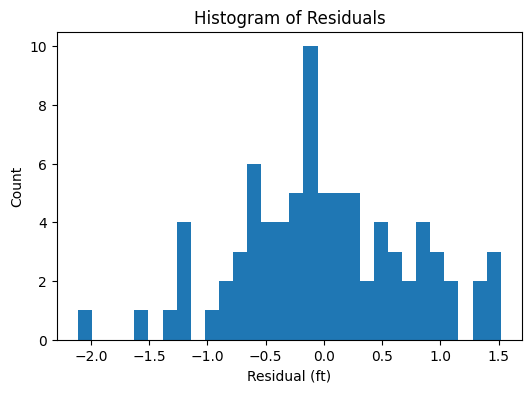

In [14]:
plt.figure(figsize=(6,4))

plt.hist(residuals, bins=30)

plt.xlabel("Residual (ft)")
plt.ylabel("Count")
plt.title("Histogram of Residuals")

plt.savefig("residual_histogram.pdf", dpi=300)
plt.show()